# import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  

# Loading dataset


In [2]:
data = pd.read_csv("/kaggle/input/up-data/diabetes.csv")
print("Successfully Imported Data!")

Successfully Imported Data!


In [3]:
##Show data
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.shape

(768, 9)

#### Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

##### 1-Pregnancies: Number of times pregnant
##### 2-Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
##### 3-BloodPressure: Diastolic blood pressure (mm Hg)
##### 4-SkinThickness: Triceps skin fold thickness (mm)
##### 5-Insulin: 2-Hour serum insulin (mu U/ml)
##### 6-BMI: Body mass index (weight in kg/(height in m)^2)
##### 7-DiabetesPedigreeFunction: Diabetes pedigree function
##### 8-Age: Age (years)
#### 9-Outcome: Class variable (0 or 1)

## Data Cleaning

## 1-deals with Missing Values 
## How many missing data points do we have?

In [5]:
missing_values = data.isnull().sum()
missing_values

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## then  no missing values in data
## If we have missing values then we can 
#### 1-Drop missing values
#### 2-Filling in missing values automatically
(Another option is to try and fill in the missing values)

In [6]:
#1 remove all the rows that contain a missing value
data_clean = data.dropna()
data_clean.shape

(768, 9)

In [7]:
#2 remove all columns with at least one missing value
columns_with_na_dropped = data.dropna(axis=1)
columns_with_na_dropped.head()
##data_clean.shape

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
#3 just how much data did we lose?
print("Columns in original dataset: ", data.shape[1])
print("Columns with na's dropped: " , columns_with_na_dropped.shape[1])

Columns in original dataset:  9
Columns with na's dropped:  9


In [9]:
#4 Filling in missing values automatically(replace all NA's with 0)
data_clean = data.fillna(0)
data_clean.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
#5 replace all NA's the value that comes directly after it in the same column, 
data_clean = data.fillna(method='bfill', axis=0) # bfill and backfill is the same
data_clean.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
data_clean.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# 2- detect and remove outliers

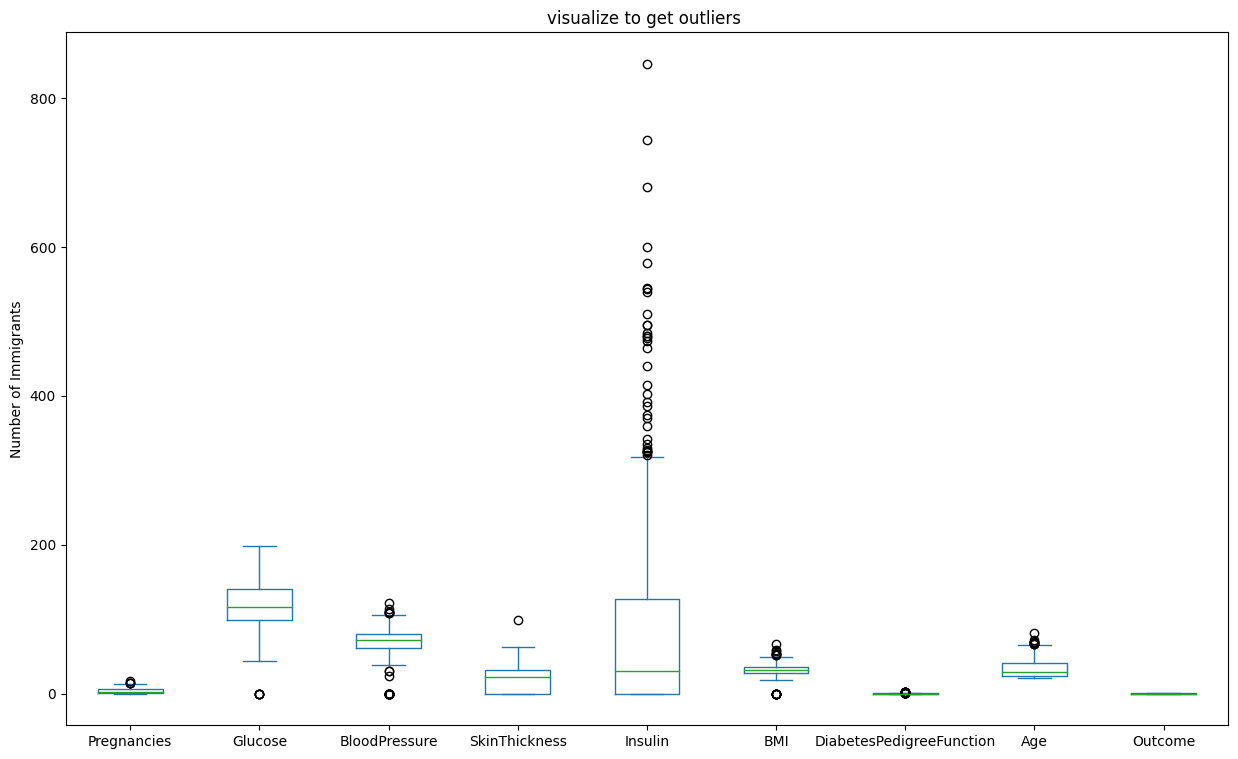

In [12]:
# Box Plot
data.plot(kind='box', figsize=(15, 9))

plt.title('visualize to get outliers ')
plt.ylabel('Number of Immigrants')

plt.show()